# CA1 - Used Car Prices

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

data = pd.read_csv('used_cars_UK.csv')
data.head(3)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN


In [41]:
data.shape

(3685, 14)

In [42]:
data.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [43]:
data.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [44]:
# Keeping only the data I think I will need
df = data[['Price','Mileage(miles)','Registration_Year','Fuel type','Body type','Engine','Emission Class', 'Doors', 'Seats']]
df.shape

(3685, 9)

In [45]:
df.dropna(inplace=True)
df.rename(columns={'Mileage(miles)':'Mileage'}, inplace = True)

C:\Users\manua\AppData\Local\Temp\ipykernel_23812\3956700061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\manua\AppData\Local\Temp\ipykernel_23812\3956700061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Mileage(miles)':'Mileage'}, inplace = True)


In [46]:
df.isnull().sum()

Price                0
Mileage              0
Registration_Year    0
Fuel type            0
Body type            0
Engine               0
Emission Class       0
Doors                0
Seats                0
dtype: int64

In [47]:
df.head()

,Price,Mileage,Registration_Year,Fuel type,Body type,Engine,Emission Class,Doors,Seats
0,6900,70189,2016,Diesel,Hatchback,1.4L,Euro 6,5.0,5.0
1,1495,88585,2008,Petrol,Hatchback,1.2L,Euro 4,3.0,5.0
2,949,137000,2011,Petrol,Hatchback,1.4L,Euro 5,5.0,5.0
3,2395,96731,2010,Petrol,Hatchback,1.4L,Euro 4,3.0,4.0
4,1000,85000,2013,Diesel,Hatchback,1.3L,Euro 5,5.0,5.0


In [48]:
#Convert engine and emmission class coumns from objects to floats
df['Engine'] = df['Engine'].str.replace('L','').astype(float)
df['Emission Class'] = df['Emission Class'].str.replace('Euro','').astype(float)
df.head()

C:\Users\manua\AppData\Local\Temp\ipykernel_23812\1522213598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'] = df['Engine'].str.replace('L','').astype(float)
C:\Users\manua\AppData\Local\Temp\ipykernel_23812\1522213598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emission Class'] = df['Emission Class'].str.replace('Euro','').astype(float)


,Price,Mileage,Registration_Year,Fuel type,Body type,Engine,Emission Class,Doors,Seats
0,6900,70189,2016,Diesel,Hatchback,1.4,6.0,5.0,5.0
1,1495,88585,2008,Petrol,Hatchback,1.2,4.0,3.0,5.0
2,949,137000,2011,Petrol,Hatchback,1.4,5.0,5.0,5.0
3,2395,96731,2010,Petrol,Hatchback,1.4,4.0,3.0,4.0
4,1000,85000,2013,Diesel,Hatchback,1.3,5.0,5.0,5.0


In [49]:
#Take out the rows where body type is minibus, pickup or combi van since there to few of them to affect the predictions
df = df[df['Body type'] != 'Minibus']
df = df[df['Body type'] != 'Pickup']
df = df[df['Body type'] != 'Combi Van']
df['Body type'].value_counts()

Body type
Hatchback      2223
SUV             458
Saloon          354
Estate          167
MPV             148
Coupe           133
Convertible     104
Name: count, dtype: int64

In [50]:
#Same as above for diesel hybrid fuel type
df = df[df['Fuel type'] != 'Diesel Hybrid']
df['Fuel type'].value_counts()

Fuel type
Petrol                   2318
Diesel                   1201
Petrol Hybrid              41
Petrol Plug-in Hybrid      26
Name: count, dtype: int64

In [51]:
#One hot encode the body type and fuel type columns
df_encoded = pd.get_dummies(df, columns=['Body type', 'Fuel type' ], dtype=int)
df_encoded.head()

,Price,Mileage,Registration_Year,Engine,Emission Class,Doors,Seats,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_SUV,Body type_Saloon,Fuel type_Diesel,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,6900,70189,2016,1.4,6.0,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0
1,1495,88585,2008,1.2,4.0,3.0,5.0,0,0,0,1,0,0,0,0,1,0,0
2,949,137000,2011,1.4,5.0,5.0,5.0,0,0,0,1,0,0,0,0,1,0,0
3,2395,96731,2010,1.4,4.0,3.0,4.0,0,0,0,1,0,0,0,0,1,0,0
4,1000,85000,2013,1.3,5.0,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0


In [52]:
# Correleation matrix to determine the relationship of each column with the price
corr = df[['Price','Mileage','Registration_Year','Engine','Doors','Seats','Emission Class']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.504398,0.786112,-0.028542,0.114457,-0.025102,0.703888
Mileage,-0.504398,1.000000,-0.445557,0.332828,-0.033107,0.095071,-0.380598
Registration_Year,0.786112,-0.445557,1.000000,-0.298173,0.213919,0.027210,0.918864
Engine,-0.028542,0.332828,-0.298173,1.000000,-0.060368,0.072039,-0.264198
Doors,0.114457,-0.033107,0.213919,-0.060368,1.000000,0.498436,0.178001
Seats,-0.025102,0.095071,0.027210,0.072039,0.498436,1.000000,0.023522
Emission Class,0.703888,-0.380598,0.918864,-0.264198,0.178001,0.023522,1.000000


In [53]:
#Registration year has a stronger correlation to price than emission class so I drop emission class
df_encoded.drop('Emission Class', axis=1, inplace=True)
df_encoded.head()

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_SUV,Body type_Saloon,Fuel type_Diesel,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,6900,70189,2016,1.4,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0
1,1495,88585,2008,1.2,3.0,5.0,0,0,0,1,0,0,0,0,1,0,0
2,949,137000,2011,1.4,5.0,5.0,0,0,0,1,0,0,0,0,1,0,0
3,2395,96731,2010,1.4,3.0,4.0,0,0,0,1,0,0,0,0,1,0,0
4,1000,85000,2013,1.3,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0


In [54]:
df.describe()

,Price,Mileage,Registration_Year,Engine,Emission Class,Doors,Seats
count,3586.000000,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000
mean,5781.496933,8.149796e+04,2011.948410,1.602342,4.914389,4.318182,4.898215
std,4502.225828,3.954498e+04,4.740327,0.485373,0.901373,0.986938,0.575620
min,400.000000,1.000000e+00,1993.000000,0.800000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,1.300000,4.000000,3.000000,5.000000
50%,3999.000000,8.000000e+04,2012.000000,1.600000,5.000000,5.000000,5.000000
75%,7999.000000,1.030742e+05,2016.000000,1.900000,6.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,6.300000,6.000000,5.000000,7.000000


In [55]:
#Created scatterplots of every column vs price to better visualise the correlation

<Axes: xlabel='Registration_Year', ylabel='Price'>

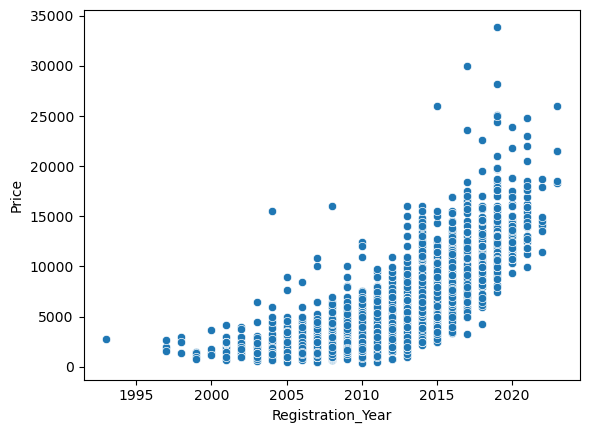

In [56]:
sn.scatterplot(x='Registration_Year', 
                y='Price', data=df) 

<Axes: xlabel='Engine', ylabel='Price'>

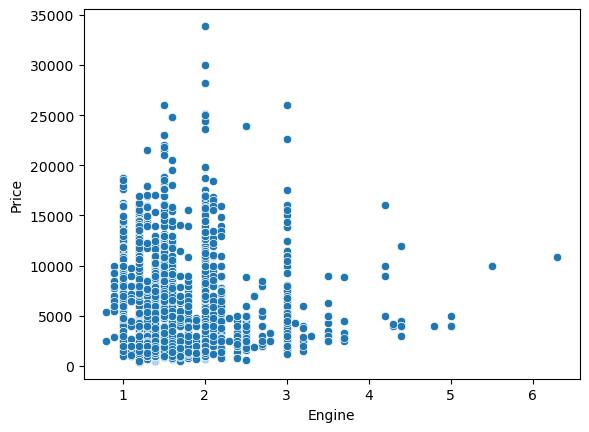

In [57]:
sn.scatterplot(x='Engine', 
                y='Price', data=df) 

<Axes: xlabel='Body type', ylabel='Price'>

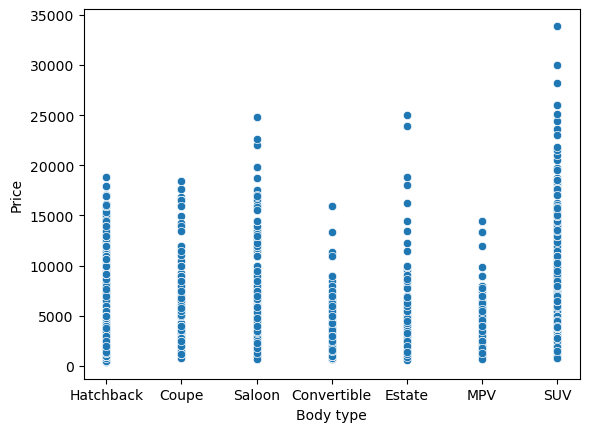

In [58]:
sn.scatterplot(x='Body type', 
                y='Price', data=df) 

<Axes: xlabel='Fuel type', ylabel='Price'>

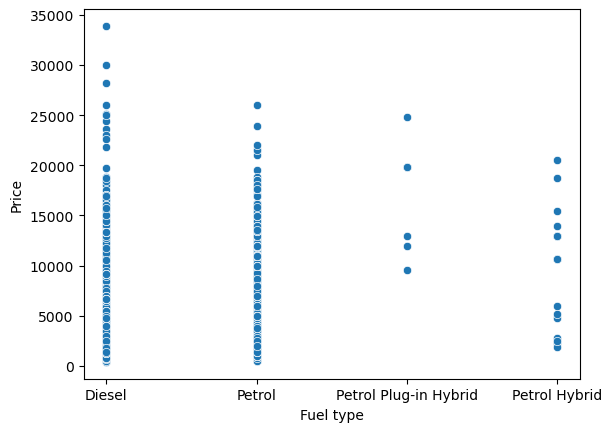

In [59]:
sn.scatterplot(x='Fuel type', 
                y='Price', data=df) 

<Axes: xlabel='Mileage', ylabel='Price'>

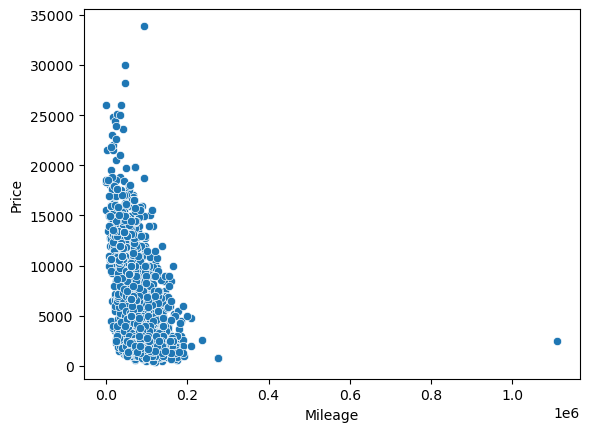

In [60]:
sn.scatterplot(x='Mileage', 
                y='Price', data=df) 

In [61]:
Xm = df[["Mileage"]]
y = df["Price"]

Xm_train, Xm_test, y_train, y_test = train_test_split(Xm, y, random_state=0)

model = LinearRegression()
model.fit(Xm_train, y_train)
model.score(Xm_test, y_test)

0.09417445917639877

In [62]:
y_predicted = model.predict(Xm_test)
number_of_correct_predictions = (
    y_predicted == y_test
).sum()
number_of_predictions = len(y_predicted)
percentage_correct = round(number_of_correct_predictions/number_of_predictions, 4)
print(
    f"{number_of_correct_predictions}/{number_of_predictions} ({percentage_correct}) "
    "of predictions are correct"
)

0/897 (0.0) of predictions are correct


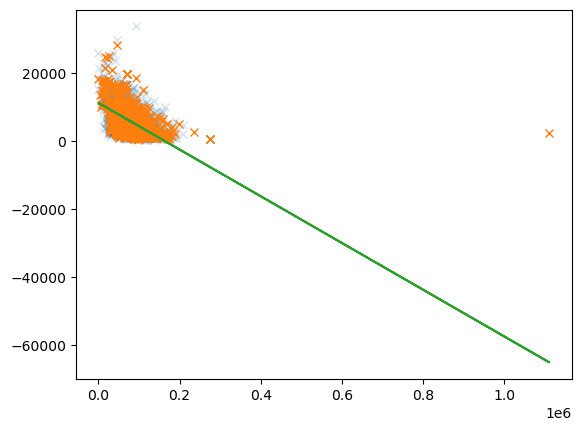

In [63]:
plt.plot(Xm_train, y_train, 'x', alpha=0.2)
plt.plot(Xm_test, y_test, 'x')
plt.plot(Xm_test, y_predicted)
plt.show()
#the line goes much further down than needed due to an outlier in the data

In [64]:
Xyear = df[["Registration_Year"]]

Xyear_train, Xyear_test, y_train, y_test = train_test_split(Xyear, y, random_state=0)

model = LinearRegression()
model.fit(Xyear_train, y_train)
model.score(Xyear_test, y_test)

0.6365967044144165

In [65]:
y_predicted = model.predict(Xyear_test)
number_of_correct_predictions = (
    y_predicted == y_test
).sum()
number_of_predictions = len(y_predicted)
percentage_correct = round(number_of_correct_predictions/number_of_predictions, 4)
print(
    f"{number_of_correct_predictions}/{number_of_predictions} ({percentage_correct}) "
    "of predictions are correct"
)

0/897 (0.0) of predictions are correct


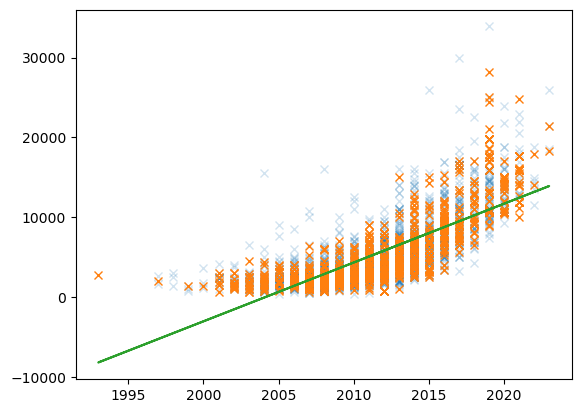

In [66]:
plt.plot(Xyear_train, y_train, 'x', alpha=0.2)
plt.plot(Xyear_test, y_test, 'x')
plt.plot(Xyear_test, y_predicted)
plt.show()

In [67]:
Xe = df[["Engine"]]
y = df["Price"]

Xe_train, Xe_test, y_train, y_test = train_test_split(Xe, y, random_state=0)

model = LinearRegression()
model.fit(Xe_train, y_train)
model.score(Xe_test, y_test)

0.0011307494216392655

In [68]:
y_predicted = model.predict(Xe_test)
number_of_correct_predictions = (
    y_predicted == y_test
).sum()
number_of_predictions = len(y_predicted)
percentage_correct = round(number_of_correct_predictions/number_of_predictions, 4)
print(
    f"{number_of_correct_predictions}/{number_of_predictions} ({percentage_correct}) "
    "of predictions are correct"
)

0/897 (0.0) of predictions are correct


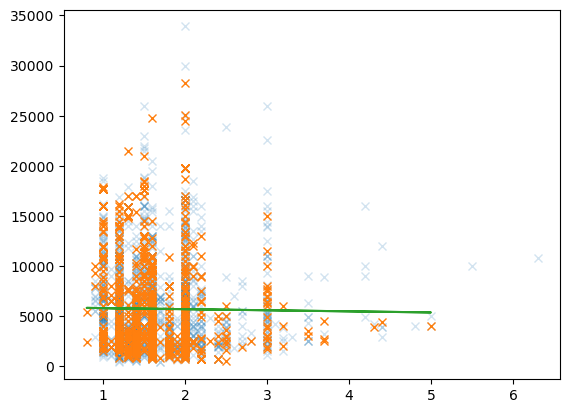

In [69]:
plt.plot(Xe_train, y_train, 'x', alpha=0.2)
plt.plot(Xe_test, y_test, 'x')
plt.plot(Xe_test, y_predicted)
plt.show()

In [70]:
feature_name = 'Registration_Year' #feature is what the target prediction is based on
target_name = 'Price' #target is what is being predicted
data_train, target_train = df[[feature_name]], df[target_name] 

In [71]:
#Arrange the data from the smallest to the largest value
data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

In [72]:
linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

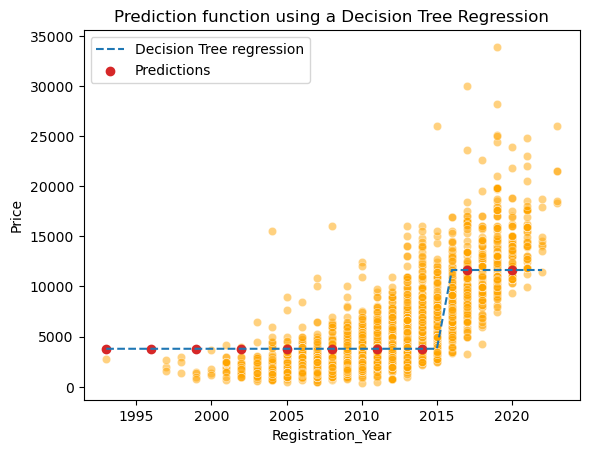

In [82]:
#This linear regression plot is the same as above but it shows where the predictions were made
ax = sn.scatterplot(
    data=df, x=feature_name, y=target_name, color="orange", alpha=0.5
)
plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Decision Tree regression",
    linestyle="--",
)
plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label="Predictions",
    color="tab:red",
)
plt.legend()
_ = plt.title("Prediction function using a Decision Tree Regression")

In [75]:
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

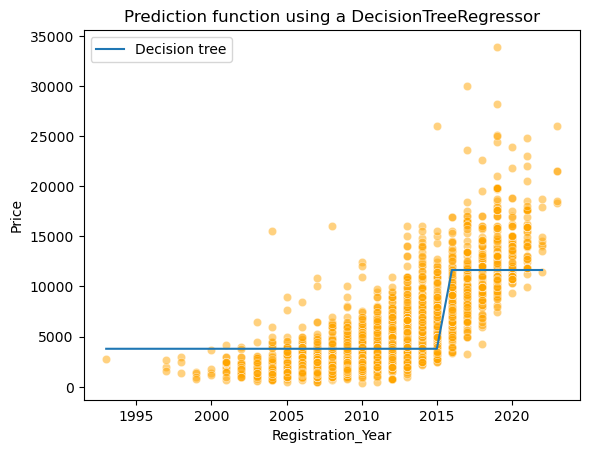

In [83]:
sn.scatterplot(
    data=df, x=feature_name, y=target_name, color="orange", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

NameError: name 'tree' is not defined

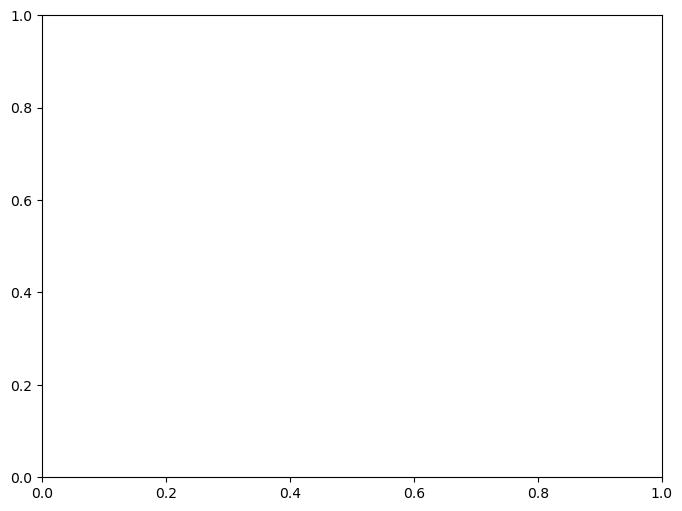

In [74]:
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

In [ ]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

In [ ]:
sn.scatterplot(
    data=df, x=feature_name, y=target_name, color="green", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label="Predictions",
    color="tab:orange",
)
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")